In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [527]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We have total 17 columns from which W is our target column and rest are feature columns. All feature columns are int64 except one which is ERA and its and average of earned runs(in float).

In [529]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values in dataset.

In [530]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here also we can confirm that there are no missing values in the data.
All the columns have very different scales compared to each other, hence before building model i have to do scalling using standard scaler.
There are no much difference in the min and 25th% compared to 75th% and max, hence there is no noticeble skewness. Its not noticeble but its there, and we will check it with the skew() function down.

<AxesSubplot:xlabel='R'>

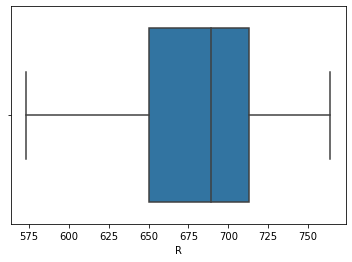

In [531]:
sns.boxplot(x=df_new['R'])

<AxesSubplot:xlabel='AB'>

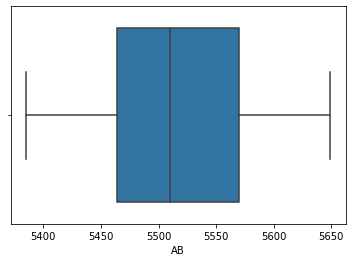

In [532]:
sns.boxplot(x=df['AB'])

<AxesSubplot:xlabel='H'>

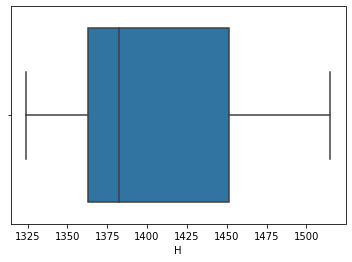

In [533]:
sns.boxplot(x=df['H'])

<AxesSubplot:xlabel='2B'>

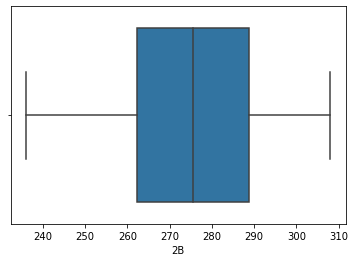

In [534]:
sns.boxplot(x=df['2B'])

<AxesSubplot:xlabel='3B'>

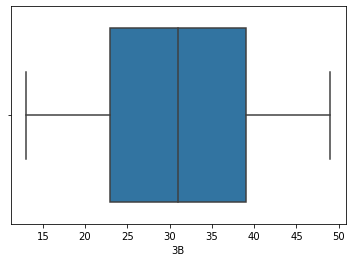

In [535]:
sns.boxplot(x=df['3B'])

<AxesSubplot:xlabel='HR'>

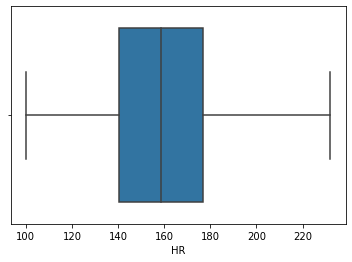

In [536]:
sns.boxplot(x=df['HR'])

<AxesSubplot:xlabel='BB'>

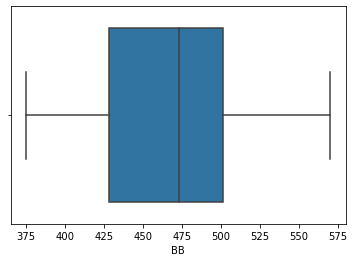

In [537]:
sns.boxplot(x=df['BB'])

<AxesSubplot:xlabel='SO'>

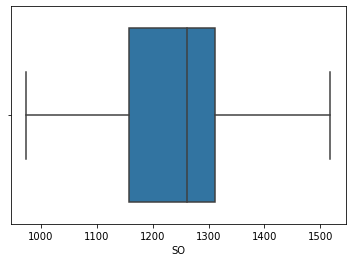

In [538]:
sns.boxplot(x=df['SO'])

<AxesSubplot:xlabel='SB'>

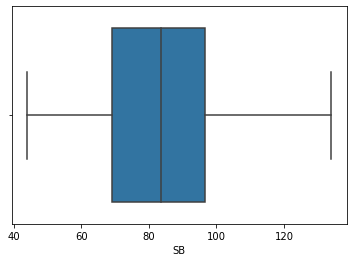

In [539]:
sns.boxplot(x=df['SB'])

<AxesSubplot:xlabel='RA'>

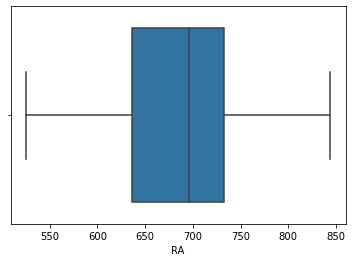

In [540]:
sns.boxplot(x=df['RA'])

<AxesSubplot:xlabel='ER'>

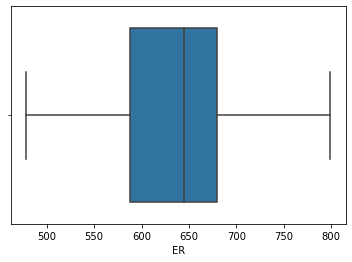

In [541]:
sns.boxplot(x=df['ER'])

<AxesSubplot:xlabel='ERA'>

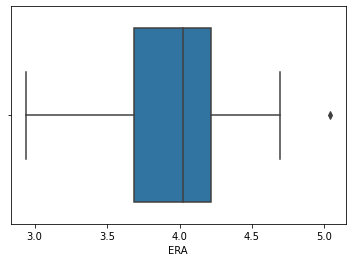

In [542]:
sns.boxplot(x=df['ERA'])

<AxesSubplot:xlabel='CG'>

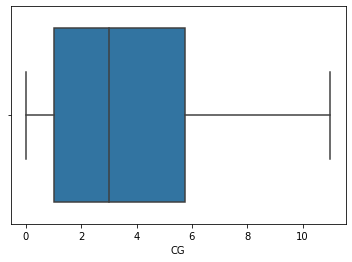

In [543]:
sns.boxplot(x=df['CG'])

<AxesSubplot:xlabel='SHO'>

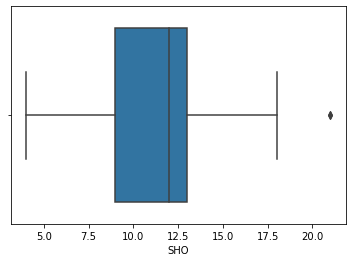

In [544]:
sns.boxplot(x=df['SHO'])

<AxesSubplot:xlabel='SV'>

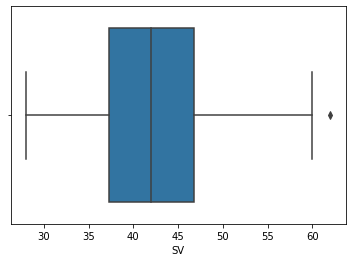

In [545]:
sns.boxplot(x=df['SV'])

<AxesSubplot:xlabel='E'>

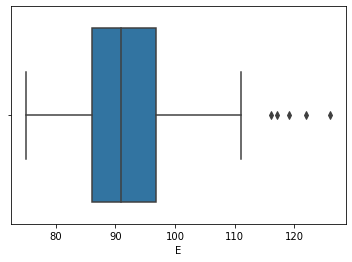

In [546]:
sns.boxplot(x=df['E'])

As we can see from above boxplots, R, ERA, SHO, SV and E variables have outliers. Let us check if we can afford to remove the outliers or not.

In [547]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new

(array([5]), array([1]))


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [548]:
df.shape

(30, 17)

In [549]:
df_new.shape

(29, 17)

As we can see only one row is removed from the data which is 3% loss in data and Hence we can afford to remove outliers.

In [550]:
import klib
%matplotlib inline

<AxesSubplot:xlabel='E', ylabel='Density'>

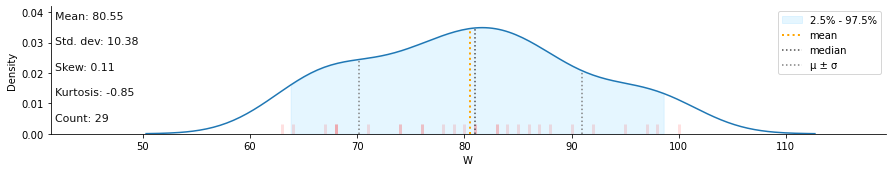

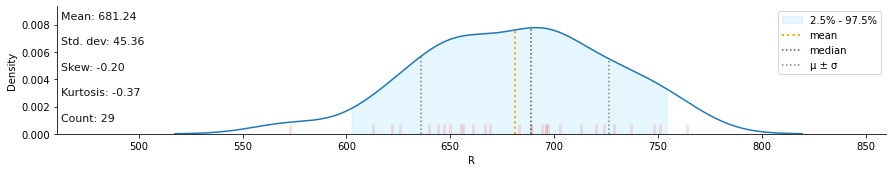

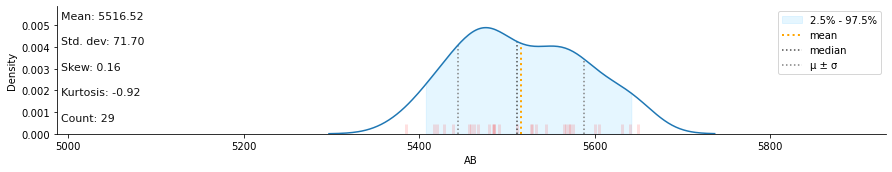

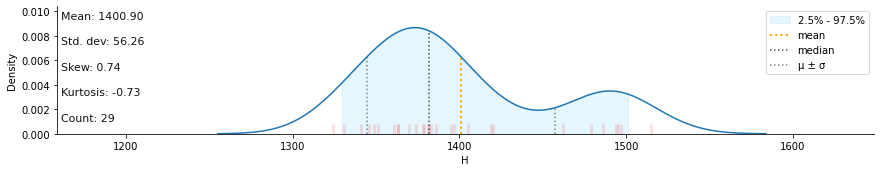

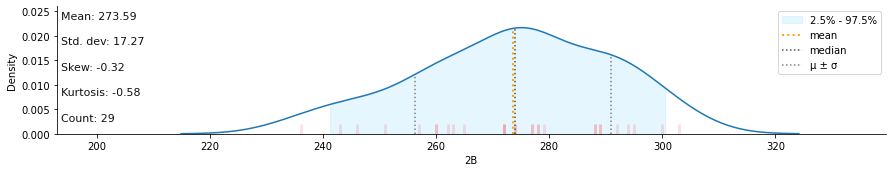

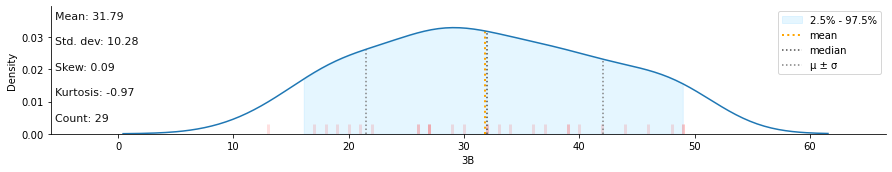

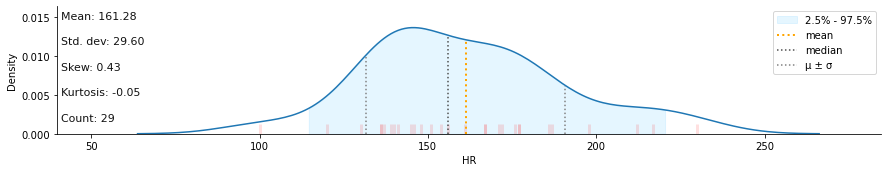

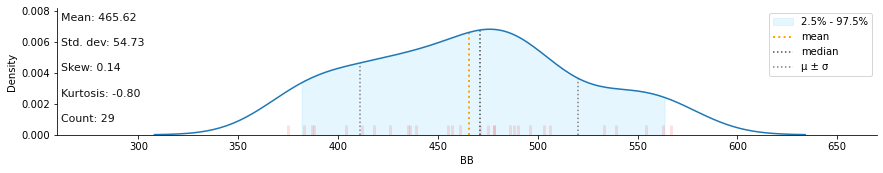

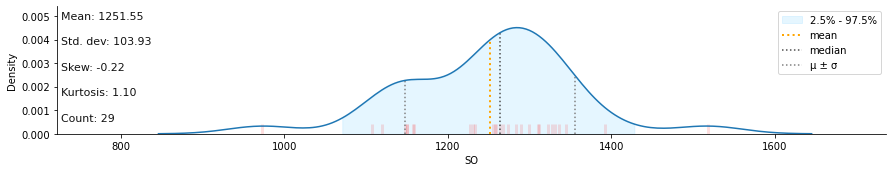

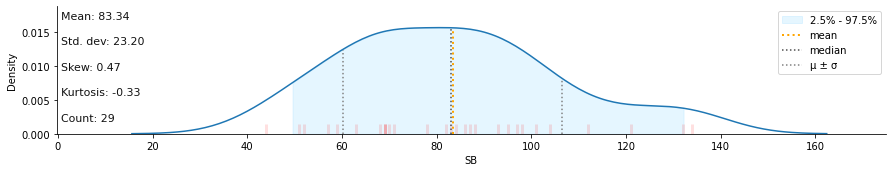

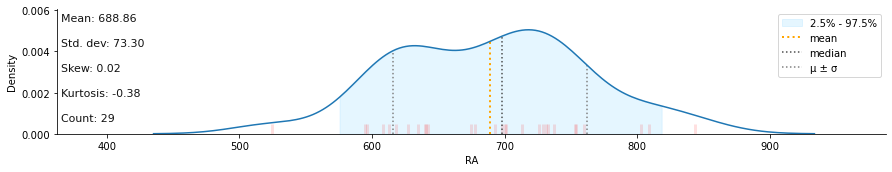

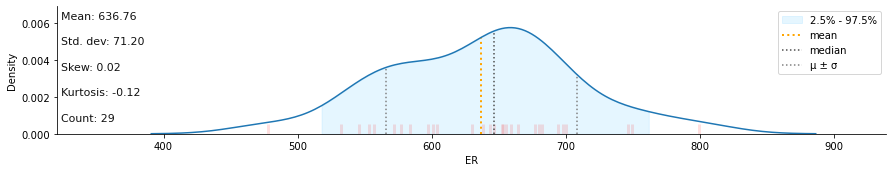

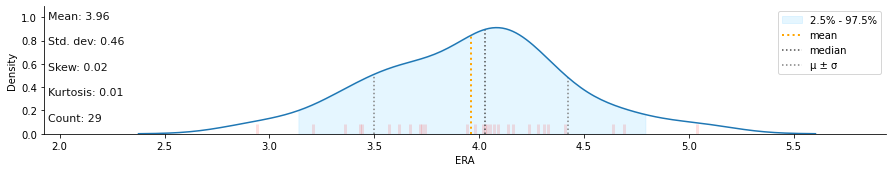

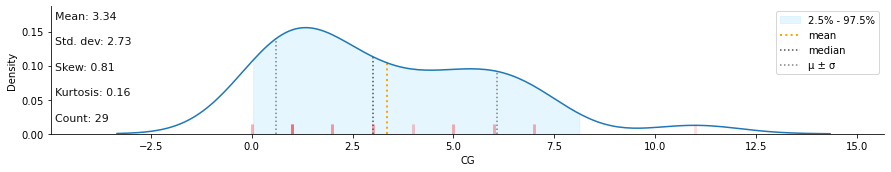

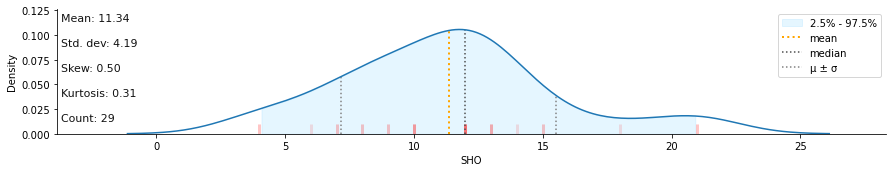

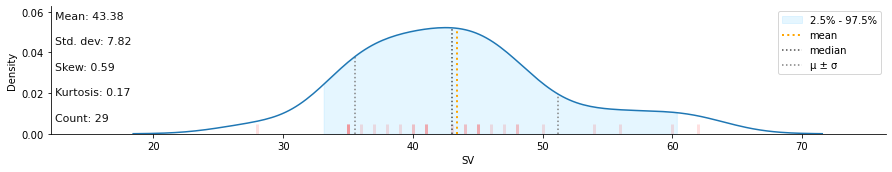

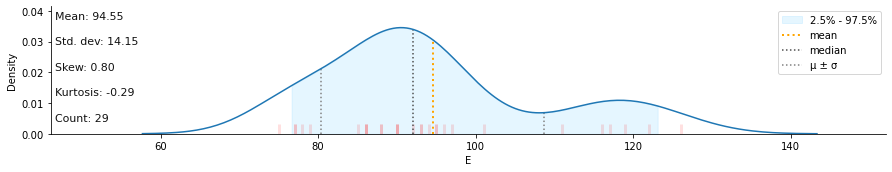

In [551]:
klib.dist_plot(data=df_new)

In [552]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

from the distplots and skewness table we can see that there are some columns which are having skewness hence i will do sqrt transforamtion and try to reduce the skeness from those variables.

In [553]:
from scipy.stats import skew
df_new['AB']=np.sqrt(df_new['AB'])
df_new['H']=np.sqrt(df_new['H'])
df_new['3B']=np.sqrt(df_new['3B'])
df_new['HR']=np.sqrt(df_new['HR'])
df_new['BB']=np.sqrt(df_new['BB'])
df_new['SB']=np.sqrt(df_new['SB'])
df_new['CG']=np.sqrt(df_new['CG'])
df_new['SHO']=np.sqrt(df_new['SHO'])
df_new['SV']=np.sqrt(df_new['SV'])
df_new['E']=np.sqrt(df_new['E'])

In [554]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.158871
H      0.761274
2B    -0.335304
3B    -0.197276
HR     0.186909
BB     0.044339
SO    -0.233815
SB     0.184522
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.714966
dtype: float64

Let us check the correlations among the variables.

In [555]:
cor = df_new.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.086104,-0.019562,0.384886,-0.194920,0.255310,0.444172,0.156469,-0.172901,-0.823176,-0.815308,-0.826952,-0.003340,0.477949,0.754886,-0.073904
R,0.390451,1.000000,0.437791,0.432903,0.469293,0.116050,0.601952,0.258432,0.081158,0.065704,-0.013858,0.007727,-0.009122,0.141559,-0.119300,0.071589,0.042051
AB,-0.086104,0.437791,1.000000,0.769075,0.490609,0.436410,-0.046205,-0.130739,-0.110697,0.377182,0.315756,0.309470,0.255206,-0.064621,-0.194943,-0.127745,0.319713
H,-0.019562,0.432903,0.769075,1.000000,0.527700,0.564618,-0.208183,-0.219033,-0.372596,0.432619,0.244127,0.280268,0.256176,0.053891,-0.127917,-0.090078,-0.012423
2B,0.384886,0.469293,0.490609,0.527700,1.000000,0.342690,-0.075503,0.217601,-0.096772,0.221012,-0.215196,-0.224993,-0.248212,0.256132,0.088345,0.258675,0.145928
3B,-0.194920,0.116050,0.436410,0.564618,0.342690,1.000000,-0.354751,-0.408093,-0.192567,0.534913,0.294069,0.314971,0.306381,0.008100,-0.062077,-0.221878,0.120633
HR,0.255310,0.601952,-0.046205,-0.208183,-0.075503,-0.354751,1.000000,0.341101,0.486579,-0.200437,-0.094437,-0.064785,-0.075167,0.110089,-0.023422,0.088591,-0.170908
BB,0.444172,0.258432,-0.130739,-0.219033,0.217601,-0.408093,0.341101,1.000000,0.314947,-0.127741,-0.422863,-0.453999,-0.464665,0.445933,0.437689,0.197673,-0.048366
SO,0.156469,0.081158,-0.110697,-0.372596,-0.096772,-0.192567,0.486579,0.314947,1.000000,0.026224,-0.140570,-0.177655,-0.195362,-0.065802,0.200067,0.105667,0.147978
SB,-0.172901,0.065704,0.377182,0.432619,0.221012,0.534913,-0.200437,-0.127741,0.026224,1.000000,0.143783,0.154147,0.137182,-0.010298,-0.103711,-0.187641,0.114433


<AxesSubplot:>

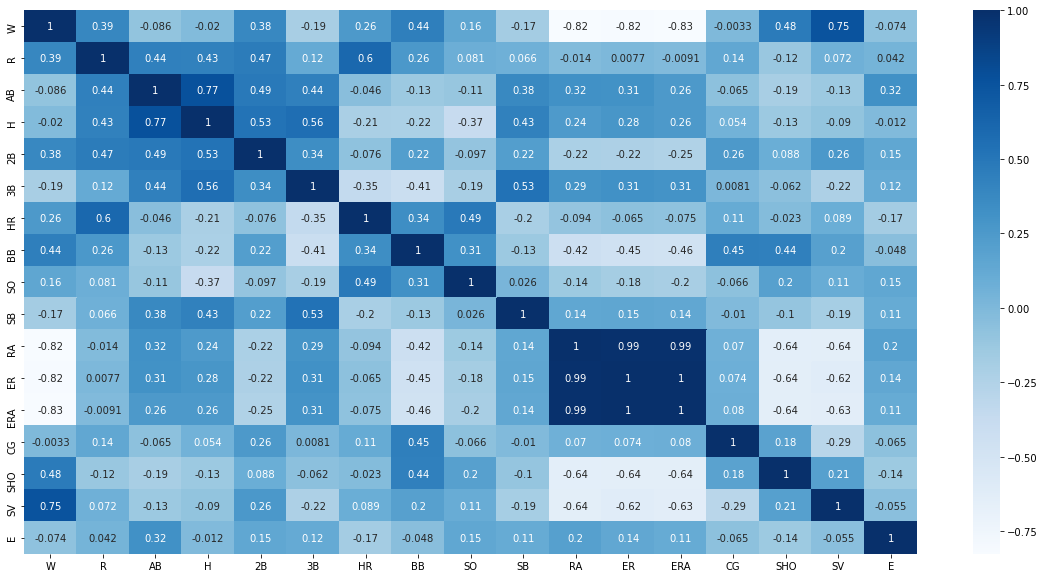

In [556]:
plt.figure(figsize=[20,10])
sns.heatmap(data=cor, annot=True, cmap='Blues')

From correlation matrix and heatmap we can confirm that ER and RA has correlation of 0.99, AB and H has correlation of 0.77 hence i will drop ER and AB as a result of mulicoleniarity. 

In [557]:
df_new.drop(columns=['ER','AB'], axis=1, inplace=True)

<AxesSubplot:>

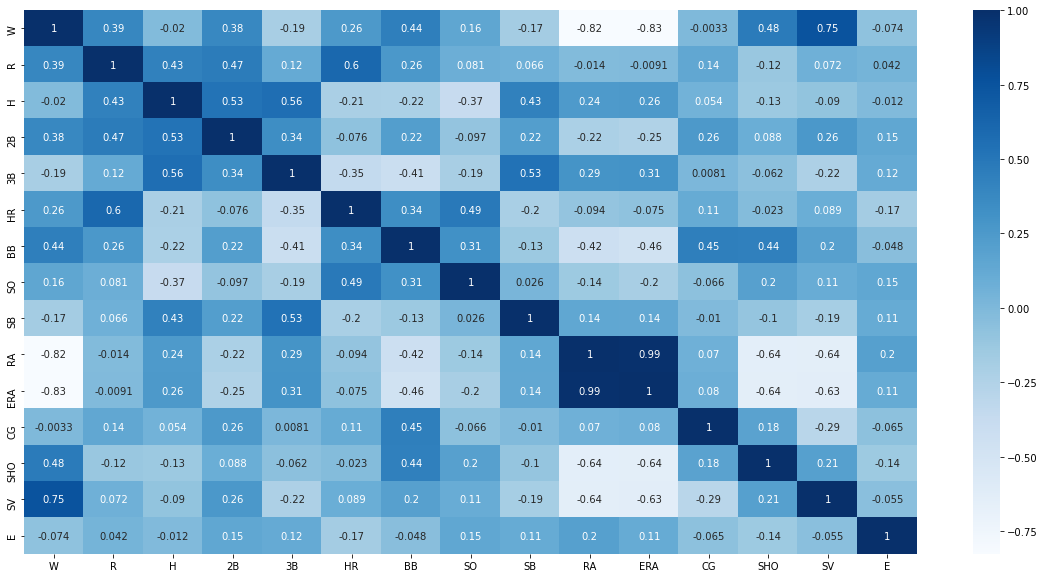

In [558]:
new_cor = df_new.corr()
plt.figure(figsize=[20,10])
sns.heatmap(data=new_cor, annot=True, cmap='Blues')

After dropping correlated columns, now there no problem of multicollinearity.

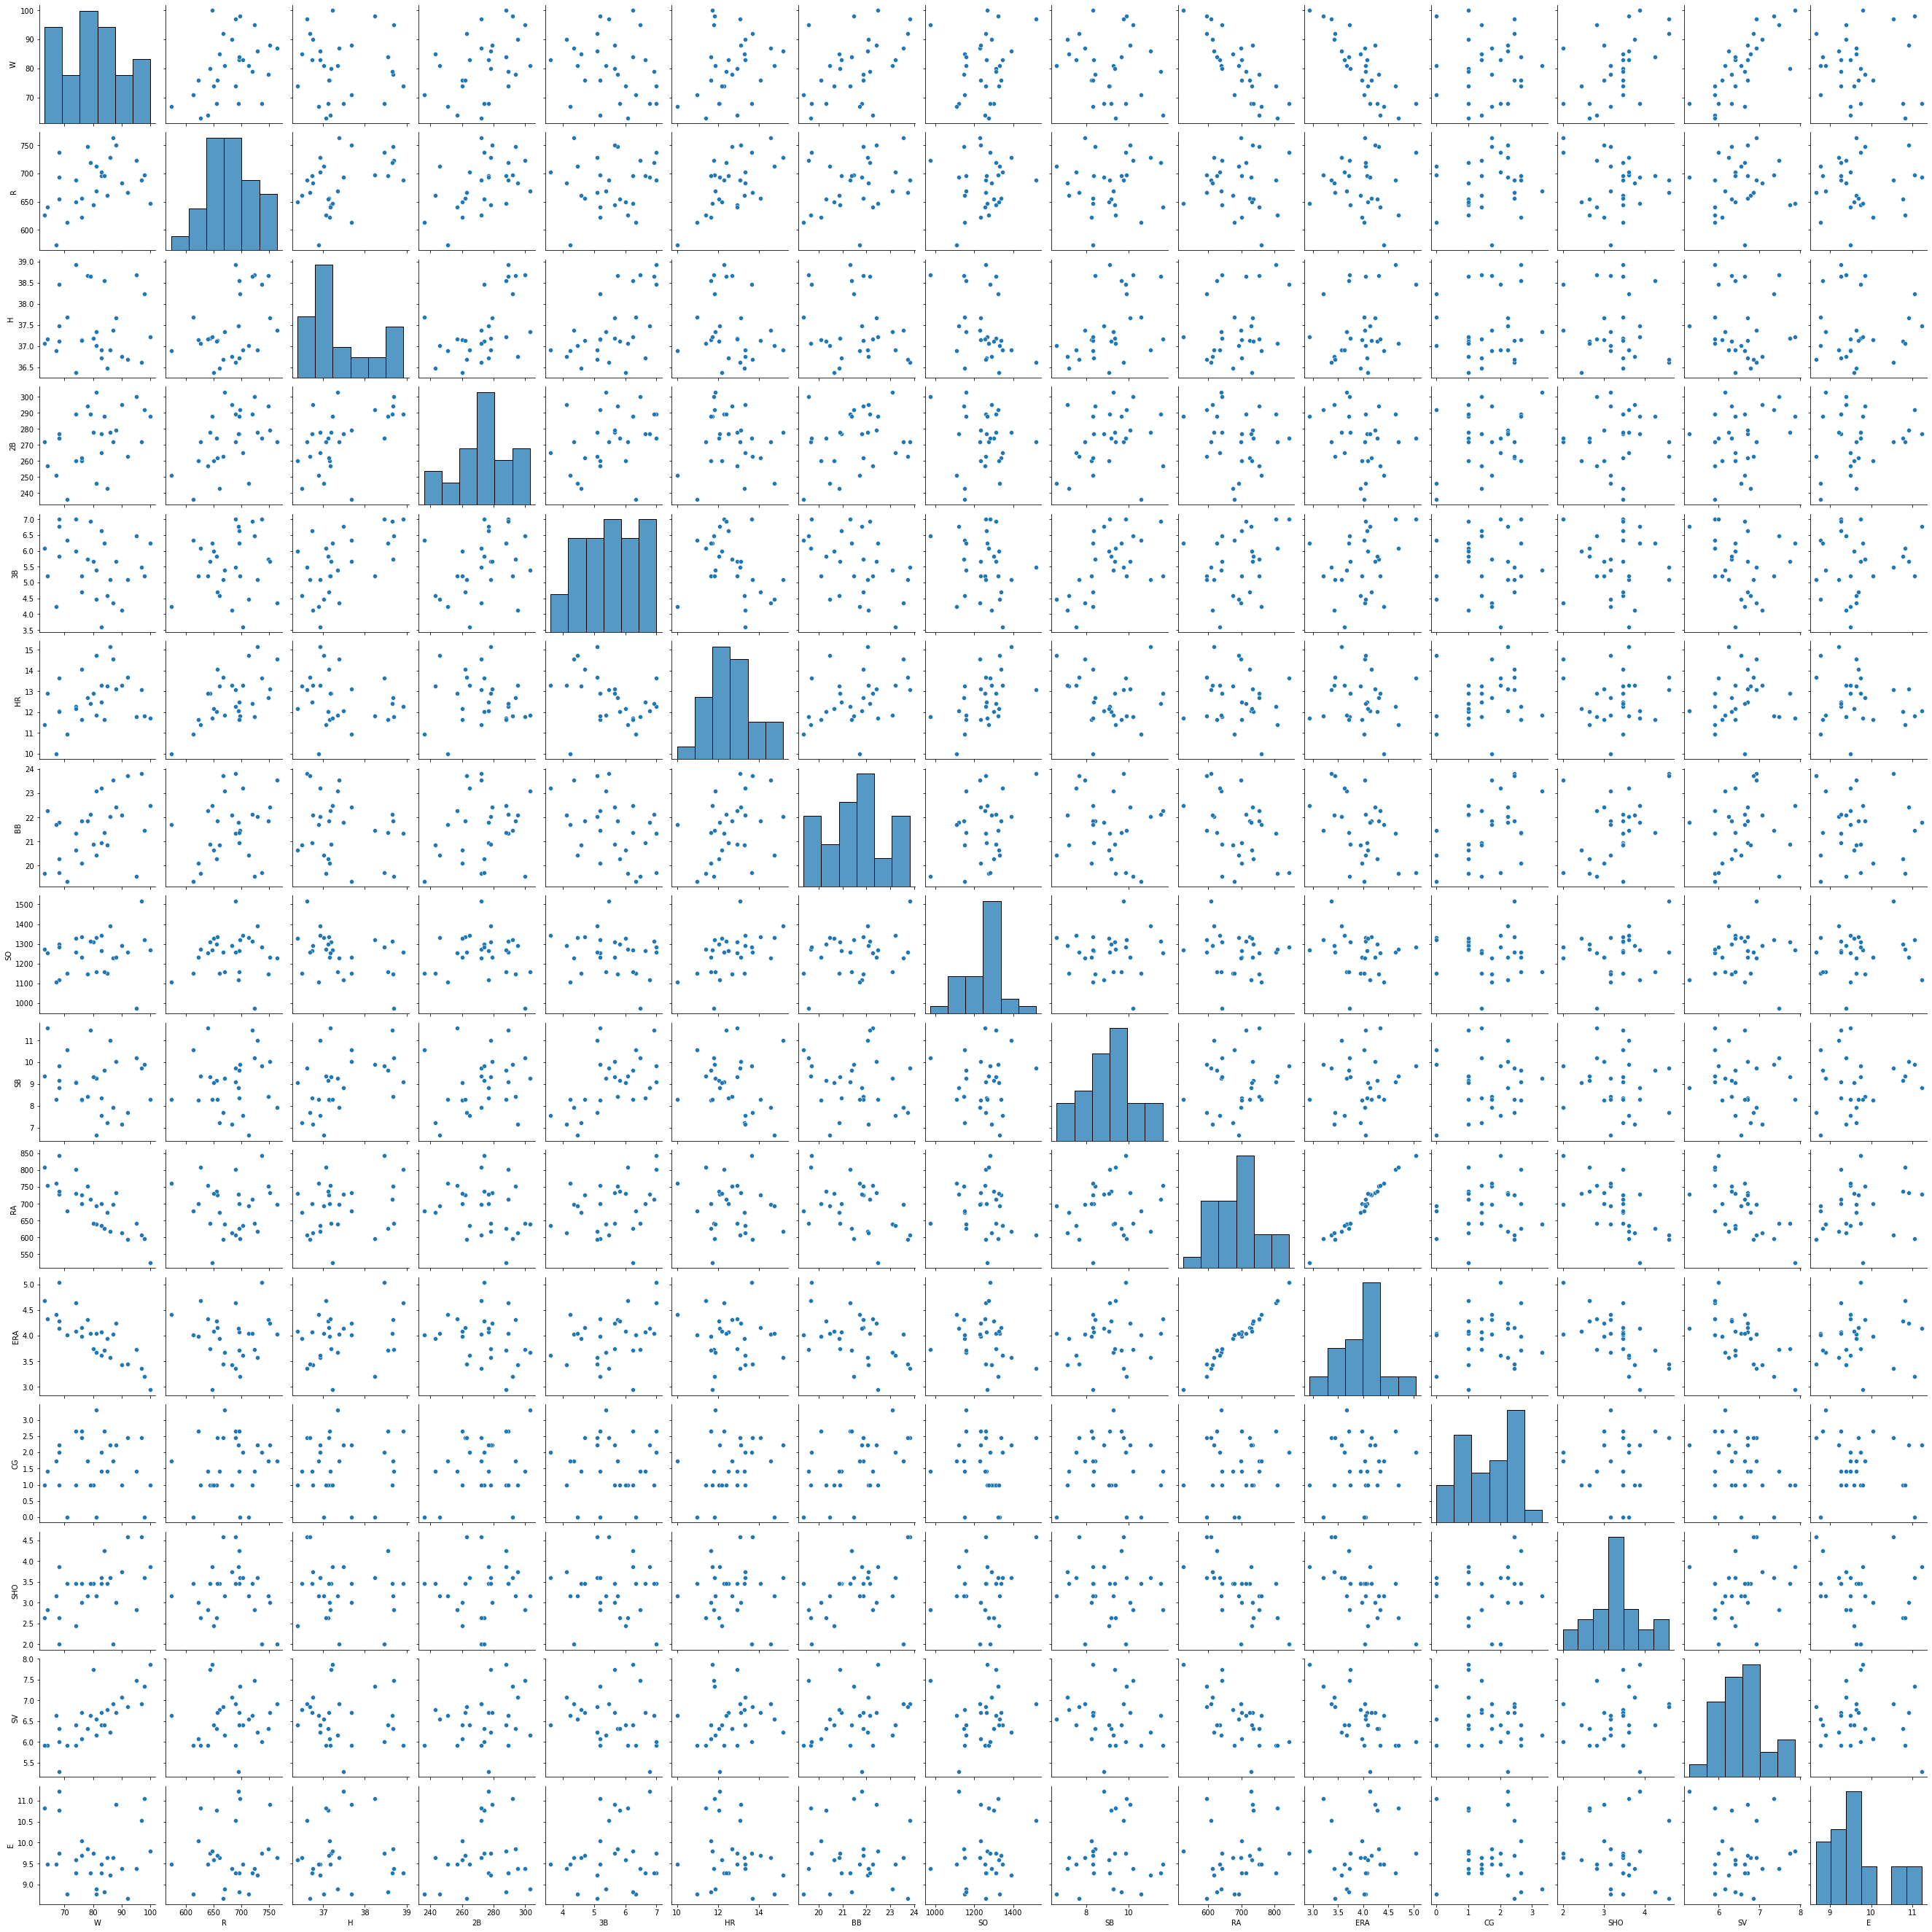

In [559]:
sns.pairplot(df_new)

In [560]:
X = df_new.drop(['W'], axis=1)
X

,R,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,38.691084,300,6.480741,11.789826,19.570386,973,10.198039,641,3.73,1.414214,2.828427,7.483315,9.380832
1,696,36.728735,277,6.633250,12.489996,20.952327,1264,8.366600,700,4.07,1.414214,3.464102,6.708204,9.273618
2,669,37.349699,303,5.385165,11.874342,23.086793,1157,9.273618,640,3.67,3.316625,3.162278,6.164414,8.888194
3,622,37.161808,260,5.196152,11.661904,20.099751,1231,8.246211,701,3.98,2.645751,3.000000,6.082763,10.049876
4,689,38.923001,289,7.000000,12.288206,21.330729,1259,9.110434,803,4.64,2.645751,3.464102,5.916080,9.273618
6,764,37.376463,272,4.358899,14.560220,23.537205,1227,7.937254,698,4.03,1.732051,2.000000,6.928203,9.643651
7,713,37.013511,246,4.472136,14.730920,20.445048,1331,6.633250,693,4.05,0.000000,3.162278,6.557439,8.774964
8,644,37.188708,278,5.656854,12.922848,20.880613,1310,9.327379,642,3.74,1.000000,3.464102,7.745967,9.746794
9,748,38.665230,294,5.744563,12.688578,21.863211,1148,8.426150,753,4.31,1.732051,3.162278,6.324555,9.848858
10,751,37.669616,279,5.656854,13.114877,22.427661,1233,10.049876,733,4.24,2.236068,3.000000,6.708204,10.908712


In [561]:
y = df_new.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [562]:
from sklearn.preprocessing import StandardScaler

sv = StandardScaler()
x = sv.fit_transform(X)
x = pd.DataFrame(x)

In [563]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.959398,1.731088,1.556538,0.999266,-0.754017,-1.582478,-2.727623,0.929246,-0.664514,-0.511388,-0.253549,-0.777436,1.602631,-0.454325
1,0.331147,-0.944305,0.201171,1.165375,-0.139045,-0.473424,0.121896,-0.546159,0.154638,0.238952,-0.253549,0.247475,0.255621,-0.607619
2,-0.274666,-0.097707,1.733325,-0.194004,-0.679785,1.239557,-0.925866,0.184533,-0.678397,-0.643801,2.020463,-0.239162,-0.689393,-1.158698
3,-1.329231,-0.353870,-0.800621,-0.399871,-0.866373,-1.157644,-0.201246,-0.643145,0.168522,0.040333,1.218547,-0.500806,-0.831290,0.502274
4,0.174084,2.047274,0.908319,1.564829,-0.316281,-0.169743,0.072935,0.053072,1.584683,1.496876,1.218547,0.247475,-1.120956,-0.607619
5,1.856900,-0.061217,-0.093474,-1.311783,1.679271,1.601027,-0.240414,-0.892040,0.126870,0.150677,0.126372,-2.113126,0.637942,-0.078546
6,0.712585,-0.556053,-1.625627,-1.188449,1.829200,-0.880532,0.777970,-1.942545,0.057451,0.194815,-1.944003,-0.239162,-0.006384,-1.320594
7,-0.835605,-0.317196,0.260100,0.101913,0.241137,-0.530977,0.572335,0.227843,-0.650630,-0.489319,-0.748671,0.247475,2.059075,0.068929
8,1.497899,1.695839,1.202964,0.197442,0.035373,0.257591,-1.013995,-0.498186,0.890486,0.768604,0.126372,-0.239162,-0.411095,0.214859
9,1.565212,0.338457,0.319029,0.101913,0.409800,0.710582,-0.181661,0.809885,0.612808,0.614123,0.728839,-0.500806,0.255621,1.730239


In [564]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.9039641720562605 on Random state  159


In [565]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=159)

In [566]:
x_train.shape

(20, 14)

In [567]:
y_train.shape

(20,)

In [568]:
x_test.shape

(9, 14)

In [569]:
y_test.shape

(9,)

In [570]:
from sklearn.linear_model import Lasso
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor(),Lasso()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.9441480328328489
R2 score for : LinearRegression() is 0.9039641720562627
Mean Squared Error for  LinearRegression() is: 9.731630564965387


KNeighborsRegressor()
0.6424930412683044
R2 score for : KNeighborsRegressor() is 0.2954385964912277
Mean Squared Error for  KNeighborsRegressor() is: 71.39555555555559


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.3453947368421053
Mean Squared Error for  DecisionTreeRegressor() is: 66.33333333333333


SVR()
0.013684794077968854
R2 score for : SVR() is -0.027259213663491044
Mean Squared Error for  SVR() is: 104.09560031790042


RandomForestRegressor()
0.9453438702650369
R2 score for : RandomForestRegressor() is 0.59971951754386
Mean Squared Error for  RandomForestRegressor() is: 40.56175555555552


Lasso()
0.84383367373633
R2 score for : Lasso() is 0.7843571961851868
Mean Squared Error for  Lasso() is: 21.85180411990107




In [571]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.3271640557582984
KNeighborsRegressor() CV Score is  -0.16715321572242292
DecisionTreeRegressor() CV Score is  -2.5160849976205033
SVR() CV Score is  -0.3208308866503918
RandomForestRegressor() CV Score is  -0.5578754042725061
Lasso() CV Score is  0.46041989399208133


As we can see above, difference between CV score and R2 score is least in the case of Random Forest Regressor.

In [577]:
from sklearn.model_selection import GridSearchCV

In [578]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [579]:
GSV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [580]:
GSV.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 17,
 'oob_score': False}

In [582]:
Final_Model = RandomForestRegressor(bootstrap= False, max_features= 'sqrt', min_samples_split= 2, n_estimators= 17, oob_score=False)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

1.0
R2 score is : 0.518701056273903
Mean Squared Error is  48.77162629757783


The Final R2 score achived by the Random forest regressor is 0.52.